# HW1 Part 2 -MGT 6203

## Instructions:


**For Homework 1 Part 2, please use this Jupyter notebook in Vocareum to submit your solutions.** Vocareum is an educational cloud platform for programming in several languages; it is based on the Jupyter notebook environment. This platform allows us to move homework assignments to the cloud. The advantages are that all of you will be working in the same coding environment AND peer reviewers will be able to run your R code easily. This way we eliminate some issues we might encounter when working on an individual/local basis, such as library installations and Rstudio OS requirements; Jupyter notebooks work on mobile platforms and tablets.

With Jupyter notebooks, you will be learning a new way of presenting data analysis reports, that is neat and flexible, where formatted English text and R code can easily coexist on the same page. Notebooks can be also collaborative when needed. Think of Jupyter notebooks as interactive program-based Google docs or MS-Office 360 docs; these are gradually replacing local files on our computers. **For now, we are asking each of you to do your own homework.**

**Many of you are new to the Jupyter notebooks and Vocareum platforms. We will provide TA help in Piazza with specific code if you have questions. ** 

Here we list some important things to get you started. Please read carefully.



<ol>
<li>Even though we are moving from your local envrionment to the cloud, **our expectations from your homework will remain the same**. Same goes for the rubrics.</li>

<li>Vocareum has its own cloud based file system, the data files you will be using for the assignments will be stored in the cloud with path **"../resource/asnlib/publicdata/FILENAME.csv"**. You will be able to import them with the same method as you do in RStudio, simply substitute the path name to the one specified in the instructions. You won't be able to modify these data files.</li>

<li>You will be able to find the data files on Canvas/EdX if you would like to explore them offline.</li>

<li>**For coding questions, you will be graded on the R code as well as the output** in your submission.</li>

<li>**For interpretations or short response questions, please type the answers in the notebook's markdown cells**. To change a code cell to a markdown cell, click on the cell, and in the dropdown menu above, switch the type of the cell block from "code" to "markdown". **Adding print statements to code cells for short response/interpretation questions is also fine, as long as we can clearly see the output of your response**.</li>

<li>Optional: if you would like to learn more about how to format your markdown cells, visit the following site: https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/. Jupyter notebook also supports LaTeX.</li>

<li>**Feel free to delete or add as many additional cells as you need**. But please try to keep your notebook clean and keep your solution directly under its respective question to avoid confusion.</li>

<li>You may delete the `#SOLUTION BEGINS/ENDS HERE` comments from the cell blocks, they are just pointers that indicate where to put your solutions.</li>

<li>**When you have finished the assignment, remember to rerun your notebook to check if it runs correctly.** You can do so by going to **`Kernel`-> `Restart & Run All`**. You may lose points if your solutions do not run successfully.</li>

<li>**Click the "`Submit`" button on the top right corner to turn in your assignment**. Your assignment will enter the next phase for peer review.</li>

<li>**You are allowed a total of <u>2 submissions</u> for this assignment.** So make sure that you submit your responses carefully. You will be able to come back and resubmit your assignment as long as it is before the start of the peer review period.</li>

<li>**Please remember to finish the peer reviews after having submitted your assignment.** You are responsible for grading the work of three of your peers thoroughly, and in addherence to the rubrics. And you will be held accountable for peer grading. **There will be a <u>30% penalty</u> to your grade if you fail to complete one or more peer reviews properly.**</li>

<li>Feel free to address your questions, concerns, and provide any feedback on Piazza. We will continuously try to improve going forward.</li>

<li>Good Luck!</li>

</ol>



# About Package Installation:

Most of the packages (if not all) that you will need to complete this assignment are already installed in this environment. An easy way to check this is to run the command: `library(PackageName)`. If this command runs successfully then the package was already installed and has been successfully attached to the code. If the command gave an error saying the Package was not found then follow the steps below to successfully install the package and attach it to the code: 

- Use `installed.packages()` command to return a table of the packages that are preinstalled in the environment.

- To attach a preinstalled library in Vocareum, simply use `library(PackageName)`

- **To install a package that does not come with the provided environment, please use the following steps:**
    
<ol>
<li>Install your desired package using the following code:</li>
     <ul>
         <li>`install.packages("PackageName", lib="../work/")`</li>
     </ul>
<li> Attach the library you just installed using the following code: </li>
    <ul>
        <li>`library(PackageName, lib.loc = "../work/")`</li>
        <li> **NOTE:** Make sure the file location is the same as the above code snippets `("../work/")` </li>
    </ul>
</ol>

## Question 1. Airbnb (32 points total)

Use dataset **`airbnb_data.csv`** for Question 1. The Airbnb dataset provides information about various properties listed on the Airbnb platform. Each row represents a unique property listing. This dataset contains the following variables:

- **`room_id`**: A unique identifier for each room listing on Airbnb.
- **`survey_id`**: A unique identifier for the survey from which the data was collected. This could be useful for tracking the source of the data.
- **`host_id`**: A unique identifier for each host on Airbnb who has listed the property.
- **`room_type`**: The type of room being listed, such as 'Entire home/apt', 'Private room', 'Shared room', etc.
- **`city`**: The city where the property is located.
- **`reviews`**: The total number of reviews the property has received from guests.
- **`overall_satisfaction`**: The overall satisfaction rating of the property, typically on a scale from 1 to 5, as reported by guests.
- **`accommodates`**: The maximum number of guests the property can accommodate comfortably.
- **`bedrooms`**: The number of bedrooms available in the property.
- **`price`**: The price per night for renting the property.

Use the code below to load necessary libraries and read the data. 

In [9]:
library(dplyr)
library(ggplot2)

# Load the data
airbnb_data = read.csv("../resource/asnlib/publicdata/airbnb_data.csv",header = TRUE)

#  suppress this warning message
suppressPackageStartupMessages(library(dplyr))


# Change headers to lower case (my personal preference for all analysis)
names(airbnb_data) = tolower(names(airbnb_data))

# Strip to non-ID fields
removeMe = c("room_id", "survey_id", "host_id", "city")
myDF = airbnb_data[, -which(names(airbnb_data) %in% removeMe)]

# Explore the data
str(myDF)
summary(myDF)

# Update room type as factor
myDF$room_type = as.factor(myDF$room_type)

'data.frame':	854 obs. of  6 variables:
 $ room_type           : chr  "Shared room" "Shared room" "Shared room" "Shared room" ...
 $ reviews             : int  0 32 4 24 152 20 52 14 3 30 ...
 $ overall_satisfaction: num  0 5 4.5 4.5 4.5 4.5 4.5 4.5 5 5 ...
 $ accommodates        : int  4 4 2 6 6 4 5 2 6 5 ...
 $ bedrooms            : int  1 1 1 1 1 1 1 1 3 2 ...
 $ price               : int  91 77 35 31 36 29 20 31 51 168 ...


  room_type            reviews       overall_satisfaction  accommodates   
 Length:854         Min.   :  0.00   Min.   :0.00         Min.   : 1.000  
 Class :character   1st Qu.:  8.00   1st Qu.:4.50         1st Qu.: 2.000  
 Mode  :character   Median : 28.00   Median :5.00         Median : 3.000  
                    Mean   : 49.11   Mean   :4.18         Mean   : 3.412  
                    3rd Qu.: 65.00   3rd Qu.:5.00         3rd Qu.: 4.000  
                    Max.   :602.00   Max.   :5.00         Max.   :17.000  
    bedrooms          price       
 Min.   : 0.000   Min.   :  20.0  
 1st Qu.: 1.000   1st Qu.:  75.0  
 Median : 1.000   Median : 102.0  
 Mean   : 1.352   Mean   : 140.9  
 3rd Qu.: 2.000   3rd Qu.: 153.8  
 Max.   :10.000   Max.   :4625.0  

### 1A. Fit a multiple linear regression model, and report variables that are statistically significant at the alpha level of 0.01. (6 points)
- Now that we have the cleaned dataset (**`myDF`**), fit a multiple linear regression model using **`price`** as the response variable. 
- Use all variables except for the ID columns and **`city`** (which have already been excluded from **`myDF`**) as predictor variables. 
- When using categorical variable **`room_type`**, use "Private room" as the base case. 


In [10]:
# SOLUTION BEGINS HERE
contrasts(myDF$room_type) = contr.treatment(3, base = 2)
contrasts(myDF$room_type)
model <- lm(formula = price ~ reviews + overall_satisfaction + accommodates + bedrooms + room_type, data = myDF)
modelSummary = summary(model)
modelSummary
# SOLUTION ENDS HERE

,1,3
Entire home/apt,1,0
Private room,0,0
Shared room,0,1



Call:
lm(formula = price ~ reviews + overall_satisfaction + accommodates + 
    bedrooms + room_type, data = myDF)

Residuals:
   Min     1Q Median     3Q    Max 
-464.6  -52.6    1.9   43.8 3517.8 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -46.434676  20.426301  -2.273 0.023259 *  
reviews               -0.007459   0.108031  -0.069 0.944967    
overall_satisfaction  -9.081773   3.759000  -2.416 0.015902 *  
accommodates          20.301341   5.670654   3.580 0.000363 ***
bedrooms             115.185249  12.402808   9.287  < 2e-16 ***
room_type1             2.176746  14.305944   0.152 0.879100    
room_type3           -72.138652  65.593710  -1.100 0.271740    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 180.9 on 847 degrees of freedom
Multiple R-squared:  0.3561,	Adjusted R-squared:  0.3516 
F-statistic: 78.08 on 6 and 847 DF,  p-value: < 2.2e-16


### 1B. Interpret the following coefficients: **`Shared room`** (the dummy variable) and  **`accomodates`**.  (3 points): 

- <u> ** Note:</u>** In the event a coefficient is not statistically significant in your analysis, please interpret both coefficients as if they were statistically significant.  
- Round to two decimals. For example `XX.xx`

In [11]:
# SOLUTION BEGINS HERE
accom_coeff <- round(modelSummary$coefficients[4,1], 2)
shared_coeff <- round(modelSummary$coefficients[7,1], 2)

paste(accom_coeff, shared_coeff)
# SOLUTION ENDS HERE

[1] "20.3 -72.14"

For every additional person the Airbnb accommodates, the price increases by $20.30.

For Airbnbs with shared rooms, the price decreases by $72.14

### 1C. Make a prediction of **`price`** for a listing.  Comment on your prediction in terms of its accuracy. (6 points)

- Assume the listing has the following factors:
  <ul>
    <li> `bedrooms` = 12
    <li> `accommodates` = 4
    <li> `reviews` = 50
    <li> `overall_satisfaction` = 4
    <li> `room_type` = 'Private room'
    </ul>
- Round the prediction to the nearest dollars. 
- What are your comments on the results?

In [12]:
# SOLUTION BEGINS HERE
reviews_coeff <- modelSummary$coefficients[2, 1]
ovrll_satis_coeff <- modelSummary$coefficients[3, 1]
accommodates_coeff <- modelSummary$coefficients[4, 1]
bedrooms_coeff <- modelSummary$coefficients[5, 1]

result1 = 50*reviews_coeff + 4*ovrll_satis_coeff + 4*accommodates_coeff + 12*bedrooms_coeff
result1

# Alt method using the predict function 
predictors <- data.frame(bedrooms = 12, accommodates = 4, reviews = 50, overall_satisfaction = 4, room_type = 'Private room')

result2 = round(predict(model, predictors, interval = 'predict'), 0)
result2[1, 1]
(round(result1, 0) - result2[1, 1]) / sd(result2)
# SOLUTION ENDS HERE

[1] 1426.728

[1] 1380

[1] 0.1077982

[1] "The results in both methods attempted are relatively close to each other (less than one standard deviation), though the scenario of given predictors is unlikely to be seen on a listing, i.e. a 12 bedroom home should accommodate more than 4 guests."


The results in both methods attempted are relatively close to each other (less than one standard deviation), though the scenario of given predictors is unlikely to be seen on a listing, i.e. a 12 bedroom home should accommodate more than 4 guests.

### 1D. Identify and display outliers using Cook's distance approach.  (6 points):

- Remove points having Cook's distance > 1. 
- Rerun the model after the removal of these points. 
- Print the summary. 


Call:
lm(formula = price ~ reviews + overall_satisfaction + accommodates + 
    bedrooms, data = myDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-204.50  -43.46  -13.24   24.04  455.20 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          51.45927    8.55982   6.012 2.73e-09 ***
reviews              -0.09561    0.04450  -2.149    0.032 *  
overall_satisfaction -2.44553    1.56261  -1.565    0.118    
accommodates         15.25040    2.20642   6.912 9.44e-12 ***
bedrooms             30.16970    5.34037   5.649 2.20e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 74.47 on 843 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.298,	Adjusted R-squared:  0.2947 
F-statistic: 89.48 on 4 and 843 DF,  p-value: < 2.2e-16


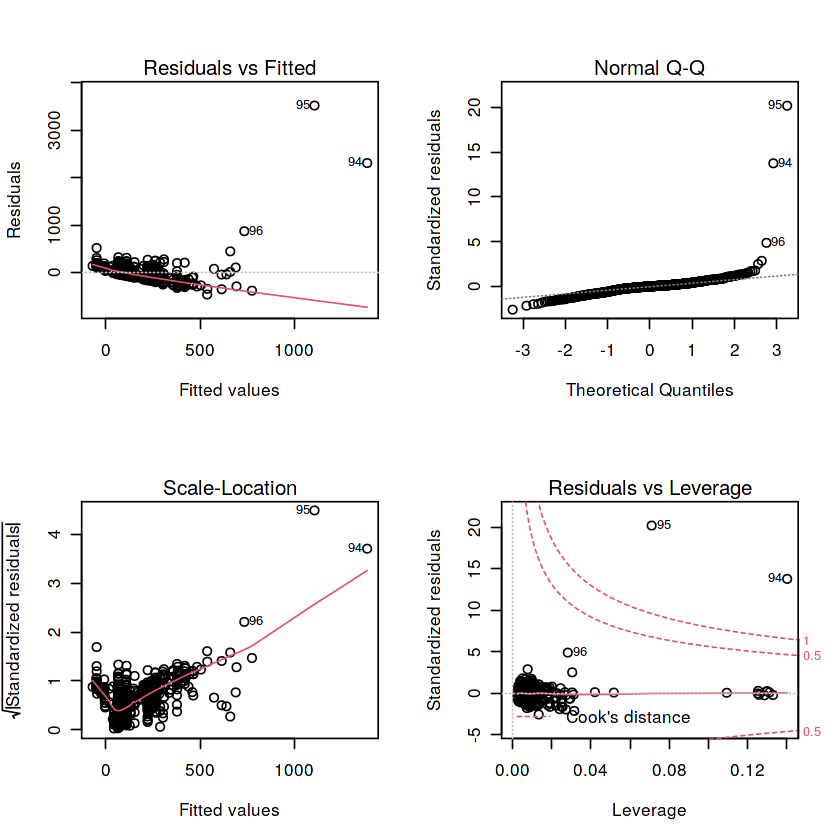

In [15]:
# SOLUTION BEGINS HERE
#module 1 lesson slides pg 41-44
par(mfrow = c(2, 2))
plot(model)

cooks <- cooks.distance(model)
influential <- cooks > 1
myDF <- myDF[!influential, ]

refit <- lm(price ~ reviews + overall_satisfaction + accommodates + bedrooms, data = myDF)
summary(refit)
# SOLUTION ENDS HERE

### 1E. Variance Inflation Factor (VIF) Function (3 points):

<ul>
<li> Using the original dataset, **`myDF`**, **<u>not</u>** the one created in 1D:
    <ul>
    <li> Create another multiple linear regression model by removing **`room_type`** from the **`myDF`** dataset.
    <li> Now it should only contain **`price`**, **`reviews`**, **`overall_satisfaction`**, **`accommodates`**, and **`bedrooms`**.
    <li> Run the VIF function and calculate the VIF value of the variable, **`accommodates`**.
    </ul>
<li> **Note:** Round to two decimals. Example `XX.xx`
</ul>

In [19]:
# SOLUTION BEGINS HERE
myDF <- myDF[, !names(myDF) %in% "room_type"]
model2 <- lm(price ~ reviews + overall_satisfaction + accommodates + bedrooms, data = myDF )
vif_values <- data.frame(round(car::vif(model2), 2))
vif_values[3, 1]
# SOLUTION ENDS HERE

[1] 2.4

### 1F. Linear/Log Regression (6 points):
 
<ul>
<li> Using the original dataset, **`myDF`**, **<u>not</u>** the one created in 1D, use **`price`** as the response variable and **`reviews`** as the predictor variable for the following regression models:
    <ul>
    <li> Linear-linear
    <li> Linear-log
    <li> Log-linear
    <li> Log-log
    </ul>
<li> **Note:** Because **`reviews`** contains ‘0’ values, you will need to use log(x+1) instead of log(x) transformations.
</ul>

In [21]:
# SOLUTION BEGINS HERE
lin_lin <- lm(price ~ reviews, data = myDF)
lin_log <- lm(price ~ log(reviews + 1), data = myDF)
log_lin <- lm(log(price + 1) ~ reviews, data = myDF)
log_log <- lm(log(price + 1) ~ log(reviews + 1), data = myDF)

lin_lin
lin_log
log_lin
log_log
# SOLUTION ENDS HERE


Call:
lm(formula = price ~ reviews, data = myDF)

Coefficients:
(Intercept)      reviews  
   137.5537      -0.2034  



Call:
lm(formula = price ~ log(reviews + 1), data = myDF)

Coefficients:
     (Intercept)  log(reviews + 1)  
         153.880            -8.461  



Call:
lm(formula = log(price + 1) ~ reviews, data = myDF)

Coefficients:
(Intercept)      reviews  
    4.74514     -0.00123  



Call:
lm(formula = log(price + 1) ~ log(reviews + 1), data = myDF)

Coefficients:
     (Intercept)  log(reviews + 1)  
         4.83445          -0.04815  


### 1G. Comparing adjusted $R^2$ (2 points)

- Which of the four models has the best adjusted $R^2$?

- Discuss how these transformations impact model fit. Does log transforming the variable improve, degrade, or have an uncertain impact on model performance?

- Compare the models and their performance with respect to adjusted $R^2$. Are these adjusted $R^2$ values generally good, bad, or uncertain across the four models as a general measure of fit? 

In [24]:
# SOLUTION BEGINS HERE
summary(lin_lin)$adj.r.squared
summary(lin_log)$adj.r.squared
summary(log_lin)$adj.r.squared
summary(log_log)$adj.r.squared
# SOLUTION ENDS HERE

[1] 0.01855568

[1] 0.0186846

[1] 0.01651154

[1] 0.01458324

The lin_log model has the best adjust r squared value as it is the greatest of the four. Each model that includes a transformation has an adjusted r squred value greater than the lin_lin model with no transformations, so we can conclude that the addition of log transformatoins whether to the response variable, predictor variable, or both, improves the model's performance. Still, all four of the models have generally bad values as they are all under 5%, meaning that not one model explains more than 5% of the relation between price and reviews (or transformations of such).


## Question 2. Direct Marketing. (12 points total)

Use the **`direct_marketing.csv`** dataset for the following questions. This dataset contains information related to customers and their interactions with a direct marketing campaign. Each row represents a unique customer, and the dataset includes the following columns:

- **`age`**: The age of the customer, indicating their age in years.
- **`gender`**: The gender of the customer, with value 'Male' or 'Female'.
- **`ownhome`**: A string variable indicating whether the customer owns or rents their home with values 'Own' or 'Rent'.
- **`married`**: A string variable indicating whether the customer is married, with values 'Married' or 'Single'.
- **`location`**: A string variables indicating distance to the nearest brick and mortar store that sells similar products with possible value 'Far' or 'Close'.
- **`salary`**: The annual salary of the customer in dollars.
- **`children`**: The number of children the customer has.
- **`history`**: A string variable indicating previous purchase volume, possible values include: 'Low', 'High', 'Medium', and 'None'. 'None' means that this customer has not yet purchased before.
- **`catalogs`**: The number of catalogs sent to the customer as part of the direct marketing campaign.
- **`amountspent`**: The amount of money spent in dollars by the customer in response to the marketing efforts.

Use the code below to load necessary libraries and read the data. 

In the following code cell, we created a dataframe, **`mydm2`** by engineering the following features:

<ul>
<li> Created indicator variables for the **`history`** column, considering the base case as 'None' in which `history` is neither "High," "Medium," nor "Low." In other words:
    <ul>
    <li> `Low` = 1 if **`history`** is "Low" or else `Low` = 0.
    <li> `Medium` = 1 if **`history`** is "Medium" or else `Medium` = 0.
    <li> `High` = 1 if **`history`** is "High" or else `High` = 0.
    </ul>
    
<li> Created interaction terms, **`lowsalary`**, **`mediumsalary`**, and **`highsalary`** based on customer **`history`** type and **`salary`**. 
</ul>

In [27]:
# Read in the dataframe
mydm <- read.csv("../resource/asnlib/publicdata/direct_marketing.csv", header = TRUE)

# Change headers to lower case (my personal preference for all analysis)
names(mydm) = tolower(names(mydm))

# create columns per question parameters
mydm2 <- mydm %>%
    mutate(low = ifelse(history == "Low", 1,0)) %>%
    mutate(medium = ifelse(history == "Medium", 1,0)) %>%
    mutate(high = ifelse(history == "High", 1,0)) %>%
    mutate(lowsalary = salary * low) %>%
    mutate(mediumsalary = salary * medium) %>%
    mutate(highsalary = salary * high)

summary(mydm2)

     age               gender            ownhome            married         
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   location             salary            children       history         
 Length:1000        Min.   :   15559   Min.   :0.000   Length:1000       
 Class :character   1st Qu.:   45528   1st Qu.:0.000   Class :character  
 Mode  :character   Median :   72017   Median :1.000   Mode  :character  
                    Mean   :  160140   Mean   :0.934                     
                    3rd Qu.:  101231   3rd Qu.:2.000                     
                 

### 2A. Fitting a Multiple Linear Regression Model (6 points):

- Fit a multiple linear regression model using **`amountspent`** as the response variable and predictor variables:  **`age`**, **`ownhome`**, **`salary`**, **`low`**, **`medium`**, **`high`**, **`lowsalary`**, **`mediumsalary`**, **`highsalary`**.
- Print the summary

In [28]:
# SOLUTION BEGINS HERE
model3 <- lm(amountspent ~ age + ownhome + salary + low + medium + high + lowsalary + mediumsalary + highsalary, data = mydm2)
summary(model3)

# SOLUTION ENDS HERE


Call:
lm(formula = amountspent ~ age + ownhome + salary + low + medium + 
    high + lowsalary + mediumsalary + highsalary, data = mydm2)

Residuals:
   Min     1Q Median     3Q    Max 
-174.8  -64.7  -31.8    9.0 6726.4 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.934e+02  1.869e+01  10.346  < 2e-16 ***
ageOld       -3.385e+00  2.142e+01  -0.158  0.87444    
ageYoung     -3.866e+00  2.230e+01  -0.173  0.86240    
ownhomeRent  -1.910e+01  1.870e+01  -1.022  0.30721    
salary        4.500e-06  8.066e-06   0.558  0.57700    
low          -1.019e+02  2.284e+01  -4.459 9.19e-06 ***
medium       -4.279e+01  2.688e+01  -1.592  0.11180    
high          6.727e+01  2.346e+01   2.868  0.00422 ** 
lowsalary     4.380e-05  1.566e-05   2.796  0.00527 ** 
mediumsalary -2.437e-05  1.432e-04  -0.170  0.86495    
highsalary   -5.986e-06  2.179e-05  -0.275  0.78356    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard erro

### 2B. Making a Prediction (6 points):

- Based on the model constructed in part 2A, what is the predicted *amountspent* by a middle age renting customer for each **`history`** type (None, Low, Medium, and High) provided their **`salary`** is \$10,000?

- **Note:**  Ignore significance for this exercise; round to nearest dollar.


In [29]:
# SOLUTION BEGINS HERE
predictors_amtspt <- data.frame(
  age = "Middle",
  ownhome = "Rent",
  salary = 10000,
    #factor variables
  low = c(1, 0, 0, 0),
  medium = c(0, 1, 0, 0),
  high = c(0, 0, 1, 0),
    #everything else set to 0
  lowsalary = 0,
  mediumsalary = 0,
  highsalary = 0)

predict_amtspt = round(predict(model3, predictors_amtspt), 0)
predict_amtspt

# SOLUTION ENDS HERE

1   2   3   4 
 73 132 242 174

## Q3 Titanic Survival (16 points total)

The goal of this problem is to predict the survival of passengers on titanic. Use **`TitanicSurvival`** dataset for the following questions, this dataset comes with R packages 'car'. It has the following variables:

- **`survived`**: The binary viariable indicating if the passenger survived with value 1 indicating survived and 0 indicating not survived.
- **`sex`**: The gender of the passenger, possible values: 'female', 'male'.
- **`age`**: Age of the passengers in years (and for some children, fractions of a year); age is missing (NA) for 263 of the passengers.
- **`passengerclass`**: Indicating the class of the passenger, possible value: '1st','2nd','3rd'.

Use the following code to read the data.

In [38]:
# Load library if needed
if (!require(car)) install.packages("car")
library(car)

# Load the data
data("TitanicSurvival")

# Change headers to lower case (my personal preference for all analysis)
names(TitanicSurvival) = tolower(names(TitanicSurvival))

# Update the survived values to 1 for yes and 0 for no.  
TitanicSurvival$survived = 
  ifelse(TitanicSurvival$survived == "yes",1,0)

# Explore the data
str(TitanicSurvival)
summary(TitanicSurvival)

'data.frame':	1309 obs. of  4 variables:
 $ survived      : num  1 1 0 0 0 1 1 0 1 0 ...
 $ sex           : Factor w/ 2 levels "female","male": 1 2 1 2 1 2 1 2 1 2 ...
 $ age           : num  29 0.917 2 30 25 ...
 $ passengerclass: Factor w/ 3 levels "1st","2nd","3rd": 1 1 1 1 1 1 1 1 1 1 ...


    survived         sex           age          passengerclass
 Min.   :0.000   female:466   Min.   : 0.1667   1st:323       
 1st Qu.:0.000   male  :843   1st Qu.:21.0000   2nd:277       
 Median :0.000                Median :28.0000   3rd:709       
 Mean   :0.382                Mean   :29.8811                 
 3rd Qu.:1.000                3rd Qu.:39.0000                 
 Max.   :1.000                Max.   :80.0000                 
                              NA's   :263                     

### 3A. Logistic Regression on Titanic (3 points): 

- Using the Titanic dataset created above (**`TitanicSurvival`**), perform a logistic regression on the dataset.
- Use **`survived`** as the response and **`sex`** as the explanatory variable. 
- Display the model summary. 
- What does the value of the intercept coefficient represent in this model?

In [43]:
# SOLUTION BEGINS HERE
logit_model <- glm(survived ~ sex, family = 'binomial', data = TitanicSurvival)
intercept <- summary(logit_model)$coefficients[1, 1]
intercept
# SOLUTION ENDS HERE

[1] 0.981813

The coefficient of the intercept is 0.98181. This represents the log-likelihood of survival when the sex variable is at its base case, female. In other words, being a female increased the likelihood of survival by 98.18%.


### 3B. Determine the odds of survival for females (3 points):

- **Note:**  Round to three decimals.  Example, `XX.xxx`

In [44]:
# SOLUTION BEGINS HERE

f_survival_odds <- exp(intercept)
f_survival_odds

cat("The odds of survival for females is", round(f_survival_odds, 3))
# SOLUTION ENDS HERE

[1] 2.669291

The odds of survival for females is 2.669

### 3C. Determine the probability of survival for males (3 points):

- **Note:**  Round to three decimals. Example, XX.xxx

In [45]:
# SOLUTION BEGINS HERE

m_coeff <- summary(logit_model)$coefficients[1, 2]

m_survival_odds <- exp(m_coeff)

m_survival_prob <- m_survival_odds / (m_survival_odds + 1)

cat("The probability of survival for males is", round(m_survival_prob, 3)*100, "%")

# SOLUTION ENDS HERE

The probability of survival for males is 52.6 %

### 3D. Logistic Regression Indicator Variables (7 points):

<ul>
<li> Create indicator variables for the variable, **`passengerclass`**.

    <ul>
    <li> Treat **`passengerclass`**= "3rd" as the base case.
    <li> Therefore, `first_class` = 1 if `passengerclass` is "1st" or else 0.
    <li> `second_class` = 1 if `passengerclass` is "2nd" or else 0.
    </ul>
    
<li> Create a logistic regression model with the variable, **`survived`**, as the response variable and the indicator variables created for **`passengerclass`** as the independent model variables.
<li> Using this model, calculate the probability of survival for the passengers in **all 3 classes.**
<li> **Note:**  Round to three decimals.  Example, `XX.xxx`
</ul>

In [46]:
# SOLUTION BEGINS HERE
contrasts(TitanicSurvival$passengerclass) = contr.treatment(3, base = 3)
contrasts(TitanicSurvival$passengerclass)

logit_model2 <- glm(survived ~ passengerclass, family = 'binomial', data = TitanicSurvival)

summary(logit_model2)

intercept <- summary(logit_model2)$coefficients[1, 1]
class3_survival_odds <- intercept
class3_survival_prob <- 100*(exp(class3_survival_odds) / (1 + exp(class3_survival_odds)))

class1_coeff <- summary(logit_model2)$coefficients[2, 1]
class1_survival_odds <- intercept + class1_coeff
class1_survival_prob <- 100*(exp(class1_survival_odds) / (1 + exp(class1_survival_odds)))

class2_coeff <- summary(logit_model2)$coefficients[3, 1]
class2_survival_odds <- intercept + class2_coeff
class2_survival_prob <- 100*(exp(class2_survival_odds) / (1 + exp(class2_survival_odds)))

round(c(class1_survival_prob, class2_survival_prob, class3_survival_prob), 3)
# SOLUTION ENDS HERE

,1,2
1st,1,0
2nd,0,1
3rd,0,0



Call:
glm(formula = survived ~ passengerclass, family = "binomial", 
    data = TitanicSurvival)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3896  -0.7678  -0.7678   0.9791   1.6525  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.07060    0.08613 -12.430  < 2e-16 ***
passengerclass1  1.55673    0.14335  10.860  < 2e-16 ***
passengerclass2  0.78713    0.14883   5.289 1.23e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1741.0  on 1308  degrees of freedom
Residual deviance: 1613.3  on 1306  degrees of freedom
AIC: 1619.3

Number of Fisher Scoring iterations: 4


[1] 61.920 42.960 25.529